In [21]:
#on gitbash or command prompt: pip install pytrends
#importing dependencies
from pytrends.request import TrendReq
from pprint import pprint
#connects to google and assigns it to variable pt
pt = TrendReq(hl = 'en-US', tz = 360)

In [4]:
#example, need the "build_payload" function prep API Methods
pt.build_payload(kw_list=['Ron DeSantis'], geo = 'US', timeframe= 'today 12-m')
#uses "interest_over_time" method to create dataframe of interest of "Ron DeSantis" over the past month from today.
interest = pt.interest_over_time()
interest
#index is date, and "isPartial" is a boolean value that is determined by if the score given was based on the completeness of a time frame, like a week of month.
    #For example, if the timeframe is "today 12-m", then it will return data from the past year, typically a week at a time. If the current day is part way through the week,
    #the "isPartial" will return as True for the last row. So that score may change as the days pass.

,Ron DeSantis,isPartial
date,,
2022-05-15,5,False
2022-05-22,5,False
2022-05-29,6,False
2022-06-05,7,False
2022-06-12,16,False
2022-06-19,15,False
2022-06-26,13,False
2022-07-03,13,False
2022-07-10,13,False


In [6]:
#"suggestions" method will return relevant terms to zero in on what you may be looking for.
#for example, typing "iron" will return "Chemical element","Golf","Genetic disorder", etc.
pt.suggestions('iron')
#'mid' is the URL portion and a unique identifier that is a combination of 'title' and 'type'
#'title' is the term you can search for, most times, a more specific term that is relevant to what you inputted into suggestions()
#'type is well... the type, since a term can encapsulate different meanings, type can further distinguish what you may be looking for.

[{'mid': '/m/025rw19', 'title': 'Iron', 'type': 'Chemical element'},
 {'mid': '/m/03cld36', 'title': 'Iron', 'type': 'Golf'},
 {'mid': '/g/122dsh1g', 'title': 'Hair Straightener', 'type': 'Topic'},
 {'mid': '/m/02n_ct', 'title': 'Iron overload', 'type': 'Genetic disorder'},
 {'mid': '/m/0cqdpw', 'title': 'Iron supplement', 'type': 'Topic'}]

In [22]:
#created a custom function that will combine the suggestion and interest over time methods into one and create a line chart. Specific for the past year and for the US only.
#Utilizes the input box for the suggested terms, if wanting to search original term, simply retype original term and enter. 
    #**IF YOU DON'T, AND SIMPLY PRESS "ESC", IT WILL NOT GENERATE NEW LINE CHART

def trendline(word):
    suggested = pt.suggestions(word)
    print('Suggested Searches:')
    pprint(suggested)     
    response = input("Type in suggested term or original term: ")
    pt.build_payload(kw_list = [response], geo = 'US', timeframe= 'today 12-m')
    result = pt.interest_over_time()
    result.plot(kind = 'line')

Suggested Searches:
[{'mid': '/m/0663v', 'title': 'Pizza', 'type': 'Dish'},
 {'mid': '/g/11k19hmrkk', 'title': 'Licorice Pizza', 'type': '2021 film'},
 {'mid': '/m/0dfxdnc', 'title': 'Pizza dough', 'type': 'Food'},
 {'mid': '/g/11hdxfw7c0', 'title': 'history of pizza', 'type': 'Food'},
 {'mid': '/g/11fl7dydwb', 'title': 'Pizza Oven', 'type': 'Topic'}]


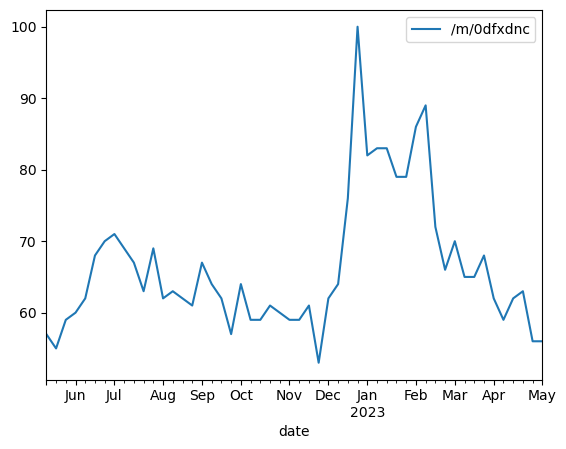

In [23]:
#demonstration of custom function "trendline"
trendline('pizza')

In [24]:
## For more info: https://pypi.org/project/pytrends/#installation